In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [2]:
df = pd.read_csv(r"C:\\Sowmya\\Personal\\NLP\\NLP_Stuffs\data\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Feature Engineering

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [7]:
X.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
X.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)


In [10]:
X.drop(['Geography', 'Gender'], axis=1, inplace=True)
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58


In [11]:
X = pd.concat([X, geography, gender], axis=1)

In [12]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [15]:
print(X_train.shape, X_test.shape)

(8000, 11) (2000, 11)


# Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[-4.38199762e-01,  1.63434970e+00,  1.42695060e-03, ...,
        -5.83123916e-01,  1.74895780e+00, -1.09831140e+00],
       [ 1.32967245e+00, -5.74052566e-01,  3.47354369e-01, ...,
        -5.83123916e-01,  1.74895780e+00, -1.09831140e+00],
       [-6.43766298e-01, -7.66087546e-01, -3.44500467e-01, ...,
        -5.83123916e-01, -5.71769086e-01,  9.10488596e-01],
       ...,
       [-2.70666889e-02,  4.82139824e-01,  1.38513662e+00, ...,
         1.71490137e+00, -5.71769086e-01,  9.10488596e-01],
       [-1.37352750e+00,  6.74174804e-01, -3.44500467e-01, ...,
        -5.83123916e-01,  1.74895780e+00,  9.10488596e-01],
       [-9.93229410e-01,  1.44231472e+00,  3.47354369e-01, ...,
         1.71490137e+00, -5.71769086e-01, -1.09831140e+00]])

In [19]:
X_test.shape

(2000, 11)

## Part 2: Create ANN

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU, ReLU
from keras.layers import Dropout

In [39]:
classifier = Sequential()

classifier.add(Dense(units=11, activation='relu'))
classifier.add(Dense(7, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(6, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [22]:
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=2)

In [25]:
model_history = classifier.fit(
    X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=[early_stopping]
)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7338 - loss: 0.5630 - val_accuracy: 0.7902 - val_loss: 0.4487
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7988 - loss: 0.4312 - val_accuracy: 0.8118 - val_loss: 0.4315
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8190 - loss: 0.4240 - val_accuracy: 0.8190 - val_loss: 0.4212
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8366 - loss: 0.3946 - val_accuracy: 0.8247 - val_loss: 0.4131
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.3848 - val_accuracy: 0.8307 - val_loss: 0.4060
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8365 - loss: 0.3887 - val_accuracy: 0.8364 - val_loss: 0.3957
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8394 - loss: 0.3880 - val_accuracy: 0.8451 - val_loss: 0.3815
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8382 - loss: 0.3759 - 

In [26]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

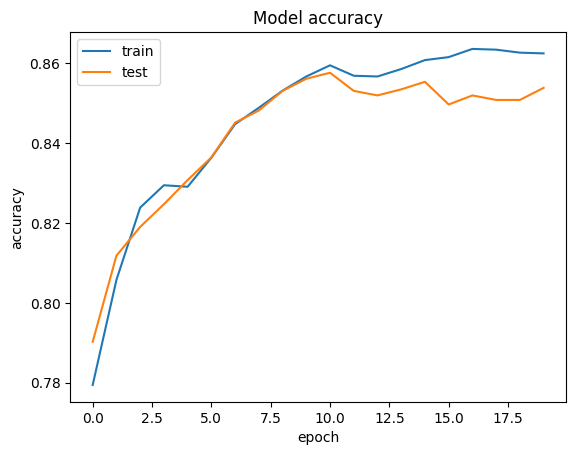

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

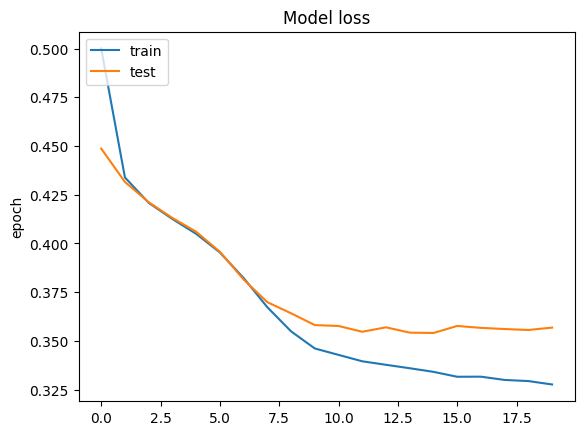

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1550,   54],
       [ 227,  169]], dtype=int64)

In [34]:
# calculate the accuracy
from sklearn.metrics import accuracy_score

In [36]:
score = accuracy_score(y_pred, y_test)
score

0.8595

In [38]:
# get the weights

classifier.get_weights()

[array([[-0.18427977,  0.05236583, -0.10796206,  0.2691955 , -0.13558877,
          0.21820158,  0.33784118,  0.00364893,  0.19238167,  0.10661179,
         -0.29329175],
        [-0.70819646,  0.69082296, -0.09632625, -0.06014201, -0.57109076,
         -0.33945966, -0.8056077 , -0.05058613,  0.39490935, -0.11062876,
         -0.0211335 ],
        [ 0.1755578 ,  0.25599238, -0.18166192, -0.45193452,  0.5931678 ,
          0.13964088, -0.22425894, -0.00623727,  0.06081531, -0.50209945,
          0.14347742],
        [-0.05743731, -0.1882224 , -0.07877076,  0.18461296, -0.31371066,
          0.1960199 ,  0.35754374,  0.2527797 ,  0.60044664, -0.04257942,
         -0.6098092 ],
        [ 0.247033  ,  0.53785086,  0.4452578 , -0.0052769 ,  0.16184986,
          0.5319011 ,  0.18943074,  1.0384609 ,  0.19460826,  0.05529842,
         -0.68971956],
        [ 0.12093182,  0.11728602, -0.2646163 , -0.07242422,  0.3981057 ,
          0.61163515, -0.06910483,  0.04265124,  0.12043548, -0.3520161